In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [5]:
df.shape

(3000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
df.describe(include = 'all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [11]:
df.shape

(2861, 10)

In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

4

Description of Age
----------------------------------------------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


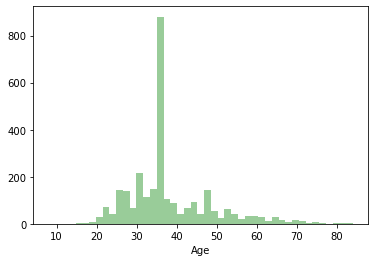

BoxPlot of Age
----------------------------------------------------------------------------


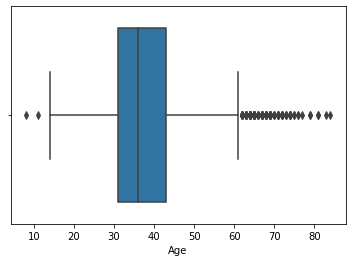

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


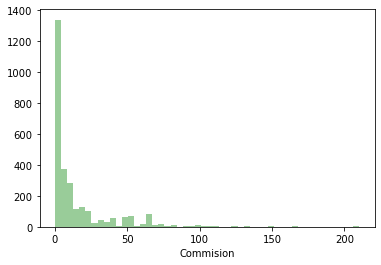

BoxPlot of Commision
----------------------------------------------------------------------------


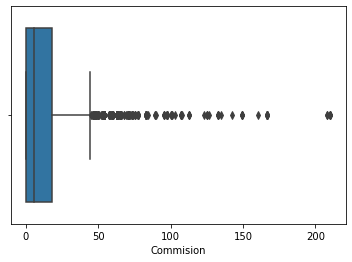

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


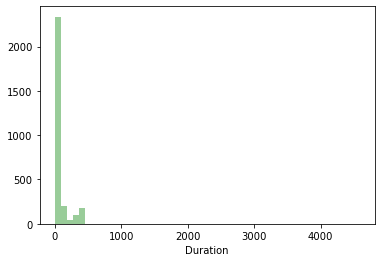

BoxPlot of Duration
----------------------------------------------------------------------------


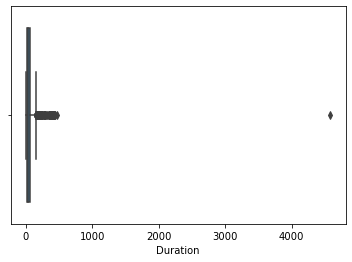

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


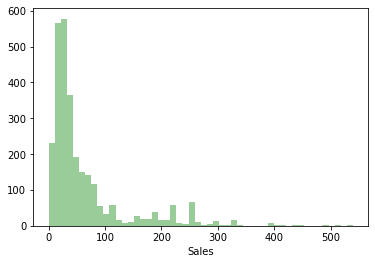

BoxPlot of Sales
----------------------------------------------------------------------------


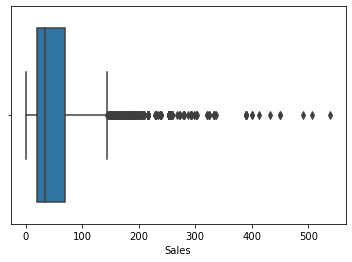

In [14]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [15]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [16]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

Details of Agency_Code
----------------------------------------------------------------
EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64


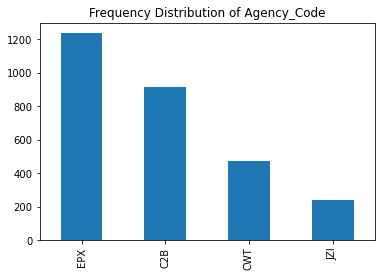

       
Details of Type
----------------------------------------------------------------
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64


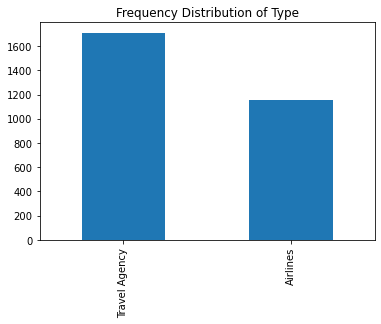

       
Details of Claimed
----------------------------------------------------------------
No     1947
Yes     914
Name: Claimed, dtype: int64


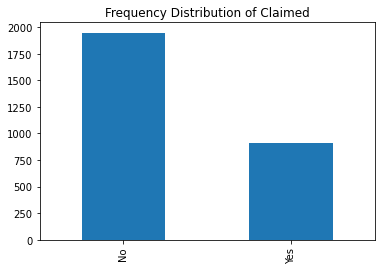

       
Details of Channel
----------------------------------------------------------------
Online     2815
Offline      46
Name: Channel, dtype: int64


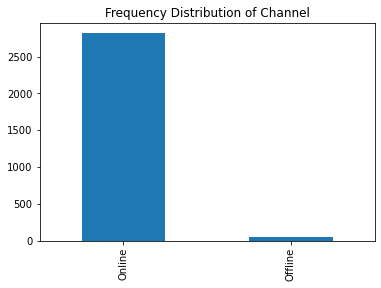

       
Details of Product Name
----------------------------------------------------------------
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64


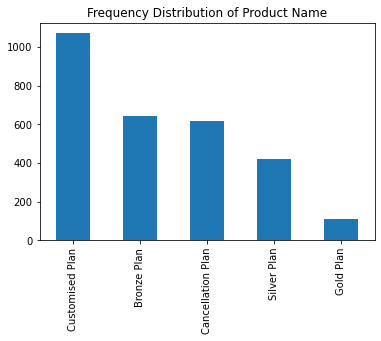

       
Details of Destination
----------------------------------------------------------------
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64


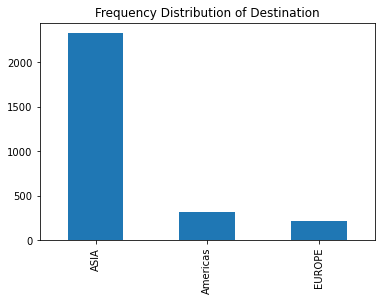

In [17]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [18]:
corr = df_num.corr(method='pearson')

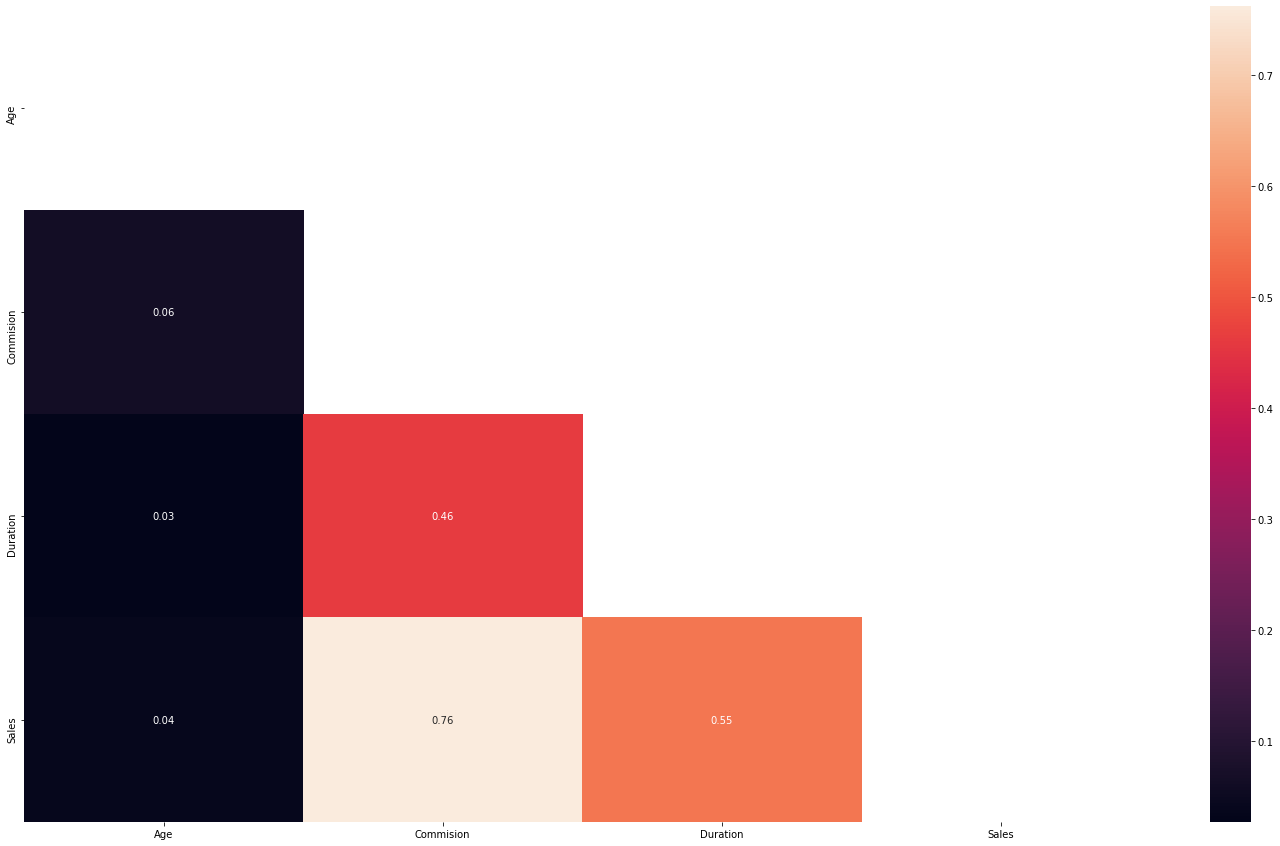

In [19]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

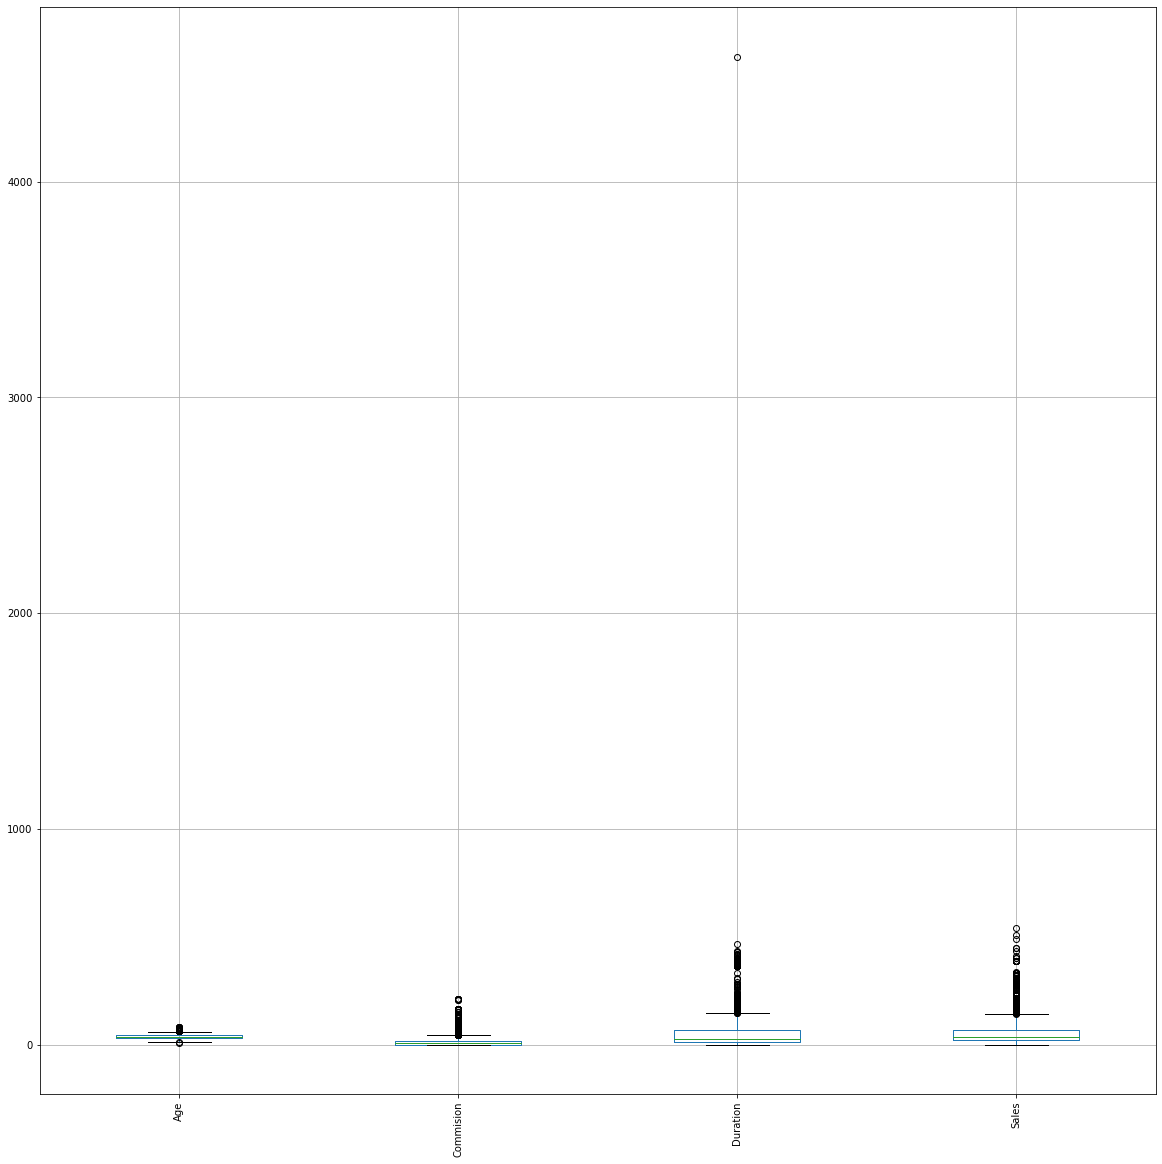

In [20]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [21]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [22]:
X = df.drop("Claimed" , axis=1)

y = df.pop("Claimed")

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

## Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [25]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [27]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [28]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 45}

In [29]:
best_grid = grid_search.best_estimator_

In [30]:
reg_dt_model = best_grid.fit(X_train, train_labels)

In [31]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1359
           1       0.70      0.59      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [34]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       588
           1       0.63      0.53      0.58       271

    accuracy                           0.75       859
   macro avg       0.72      0.69      0.70       859
weighted avg       0.75      0.75      0.75       859



AUC: 0.849


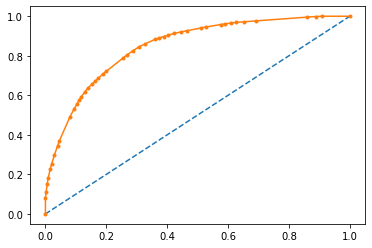

In [35]:
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.771


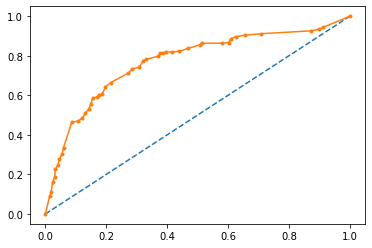

In [36]:
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [37]:
confusion_matrix(train_labels, ytrain_predict)

array([[1199,  160],
       [ 262,  381]], dtype=int64)

In [38]:
confusion_matrix(test_labels, ytest_predict)

array([[504,  84],
       [127, 144]], dtype=int64)

In [39]:
reg_dt_model.score(X_train,train_labels)

0.7892107892107892

In [40]:
reg_dt_model.score(X_test,test_labels)

0.7543655413271245

## Random Forest

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10],
    'max_features': [8, 10, 11, 12],
    'min_samples_leaf': [25, 50, 100],
    'min_samples_split': [75, 150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search1 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [42]:
grid_search1.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': [8, 10, 11, 12],
                         'min_samples_leaf': [25, 50, 100],
                         'min_samples_split': [75, 150, 300],
                         'n_estimators': [301, 501]})

In [44]:
grid_search1.best_params_

{'max_depth': 9,
 'max_features': 8,
 'min_samples_leaf': 25,
 'min_samples_split': 75,
 'n_estimators': 501}

In [48]:
best_grid = grid_search1.best_estimator_

In [49]:
reg_rf_model = best_grid.fit(X_train, train_labels)

In [45]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [46]:
print(classification_report(train_labels,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1359
           1       0.70      0.59      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [47]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       588
           1       0.63      0.53      0.58       271

    accuracy                           0.75       859
   macro avg       0.72      0.69      0.70       859
weighted avg       0.75      0.75      0.75       859



AUC: 0.843


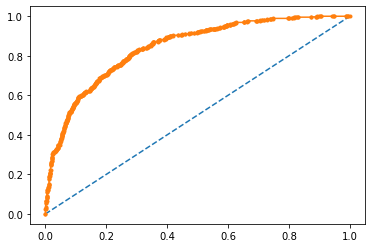

In [50]:
probs = reg_rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.810


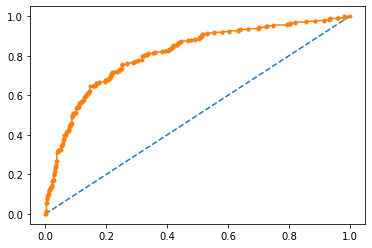

In [51]:
probs = reg_rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [52]:
confusion_matrix(train_labels,ytrain_predict1)

array([[1199,  160],
       [ 262,  381]], dtype=int64)

In [53]:
confusion_matrix(test_labels,ytest_predict1)

array([[504,  84],
       [127, 144]], dtype=int64)

In [73]:
reg_rf_model.score(X_train,train_labels)

0.7922077922077922

In [74]:
reg_rf_model.score(X_test,test_labels)

0.7823050058207218

## MPL Classifier

In [54]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [55]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search2 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [56]:
grid_search2.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [58]:
grid_search2.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [62]:
best_grid = grid_search2.best_estimator_

In [63]:
ytrain_predict2 = best_grid.predict(X_trains)
ytest_predict2 = best_grid.predict(X_tests)

AUC: 0.803


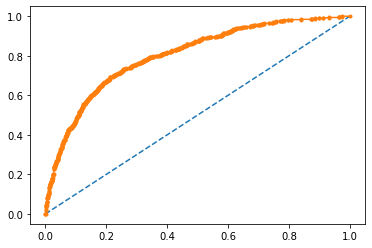

In [64]:
probs = best_grid.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.801


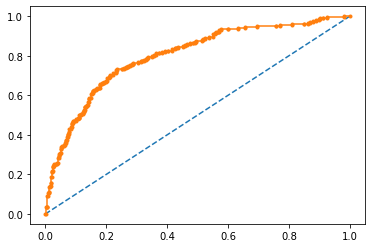

In [65]:
probs = best_grid.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [66]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1359
           1       0.67      0.57      0.61       643

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [67]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       588
           1       0.65      0.56      0.60       271

    accuracy                           0.76       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.76      0.76       859



In [68]:
confusion_matrix(train_labels,ytrain_predict2)

array([[1176,  183],
       [ 278,  365]], dtype=int64)

In [69]:
confusion_matrix(test_labels,ytest_predict2)

array([[506,  82],
       [120, 151]], dtype=int64)

In [71]:
best_grid.score(X_trains,train_labels)

0.7697302697302697

In [75]:
best_grid.score(X_tests,test_labels)

0.7648428405122235